# 탐색적 데이터 분석
## #01. 작업준비
### 1. 패키지 참조


In [17]:
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

### 2. 데이터 가져오기

In [18]:
분석데이터 = pd.read_excel('분석용데이터.xlsx')
분석데이터.head()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,3,1000094,182447499,181667733,779766,81108758,83644304,5,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
1,2018,3,1000094,4561081,3428057,1133024,0,4561081,2,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
2,2018,3,1000094,86293109,78208220,8084889,38252844,48040265,1,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
3,2018,3,1000094,93941608,60508224,33433384,45574085,36140265,1,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
4,2018,3,1000094,1692325089,1354744541,337580548,489138378,195886445,1,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175


In [19]:
df= 분석데이터.copy()

In [20]:
df['기준_년_코드'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [21]:
df.loc[(df['기준_분기_코드']==1)&(df['기준_분기_코드']==2),:]

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수


### 3. 명목형 변수에 대한 데이터 타입 변경

In [22]:
df = df.astype({
    '기준_년_코드': 'category', 
    '기준_분기_코드': 'category', 
    'covid19': 'category', 
    '상권_코드': 'category', 
    '상권_코드_명': 'category', 
    '시군구_코드': 'category', 
    '행정동_코드': 'category', 
    '시군구명': 'category', 
    '시군구코드': 'category', 
    '도심': 'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265928 entries, 0 to 265927
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    265928 non-null  category
 1   기준_분기_코드   265928 non-null  category
 2   상권_코드      265928 non-null  category
 3   분기당_매출_금액  265928 non-null  int64   
 4   주중_매출_금액   265928 non-null  int64   
 5   주말_매출_금액   265928 non-null  int64   
 6   남성_매출_금액   265928 non-null  int64   
 7   여성_매출_금액   265928 non-null  int64   
 8   점포수        265928 non-null  int64   
 9   covid19    265928 non-null  category
 10  일과시간_금액    265928 non-null  int64   
 11  일과이후_금액    265928 non-null  int64   
 12  청년금액       265928 non-null  int64   
 13  중년금액       265928 non-null  int64   
 14  장년금액       265928 non-null  int64   
 15  상권_코드_명    265928 non-null  category
 16  엑스좌표_값     265928 non-null  int64   
 17  와이좌표_값     265928 non-null  int64   
 18  시군구_코드     265928 non-null  category
 19  행정

## #02. 연속형 변수에 대한 기초 통계량 확인
### 결측치 확인

In [23]:
len(df)

265928

In [24]:
df.isnull().sum()

기준_년_코드      0
기준_분기_코드     0
상권_코드        0
분기당_매출_금액    0
주중_매출_금액     0
주말_매출_금액     0
남성_매출_금액     0
여성_매출_금액     0
점포수          0
covid19      0
일과시간_금액      0
일과이후_금액      0
청년금액         0
중년금액         0
장년금액         0
상권_코드_명      0
엑스좌표_값       0
와이좌표_값       0
시군구_코드       0
행정동_코드       0
시군구명         0
시군구코드        0
도심           0
총_직장_인구_수    0
총_생활인구_수     0
dtype: int64

In [40]:
tmp = df.filter(['시군구명', 'covid19', '분기당_매출_금액']).groupby(['시군구명', 'covid19'], as_index=False).mean()
print(tmp.isna().sum())
tmp

시군구명         0
covid19      0
분기당_매출_금액    0
dtype: int64


C:\Users\Hamin\AppData\Local\Temp\ipykernel_14164\323955896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.filter(['시군구명', 'covid19', '분기당_매출_금액']).groupby(['시군구명', 'covid19'], as_index=False).mean()


,시군구명,covid19,분기당_매출_금액
0,강남구,0,3.777450e+08
1,강남구,1,4.067136e+08
2,강동구,0,2.207858e+08
3,강동구,1,2.341338e+08
4,강북구,0,1.810091e+08
5,강북구,1,1.767230e+08
6,강서구,0,2.114053e+08
7,강서구,1,2.244594e+08
8,관악구,0,2.043014e+08
9,관악구,1,2.015775e+08


#### 비교결과 시각화

In [41]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


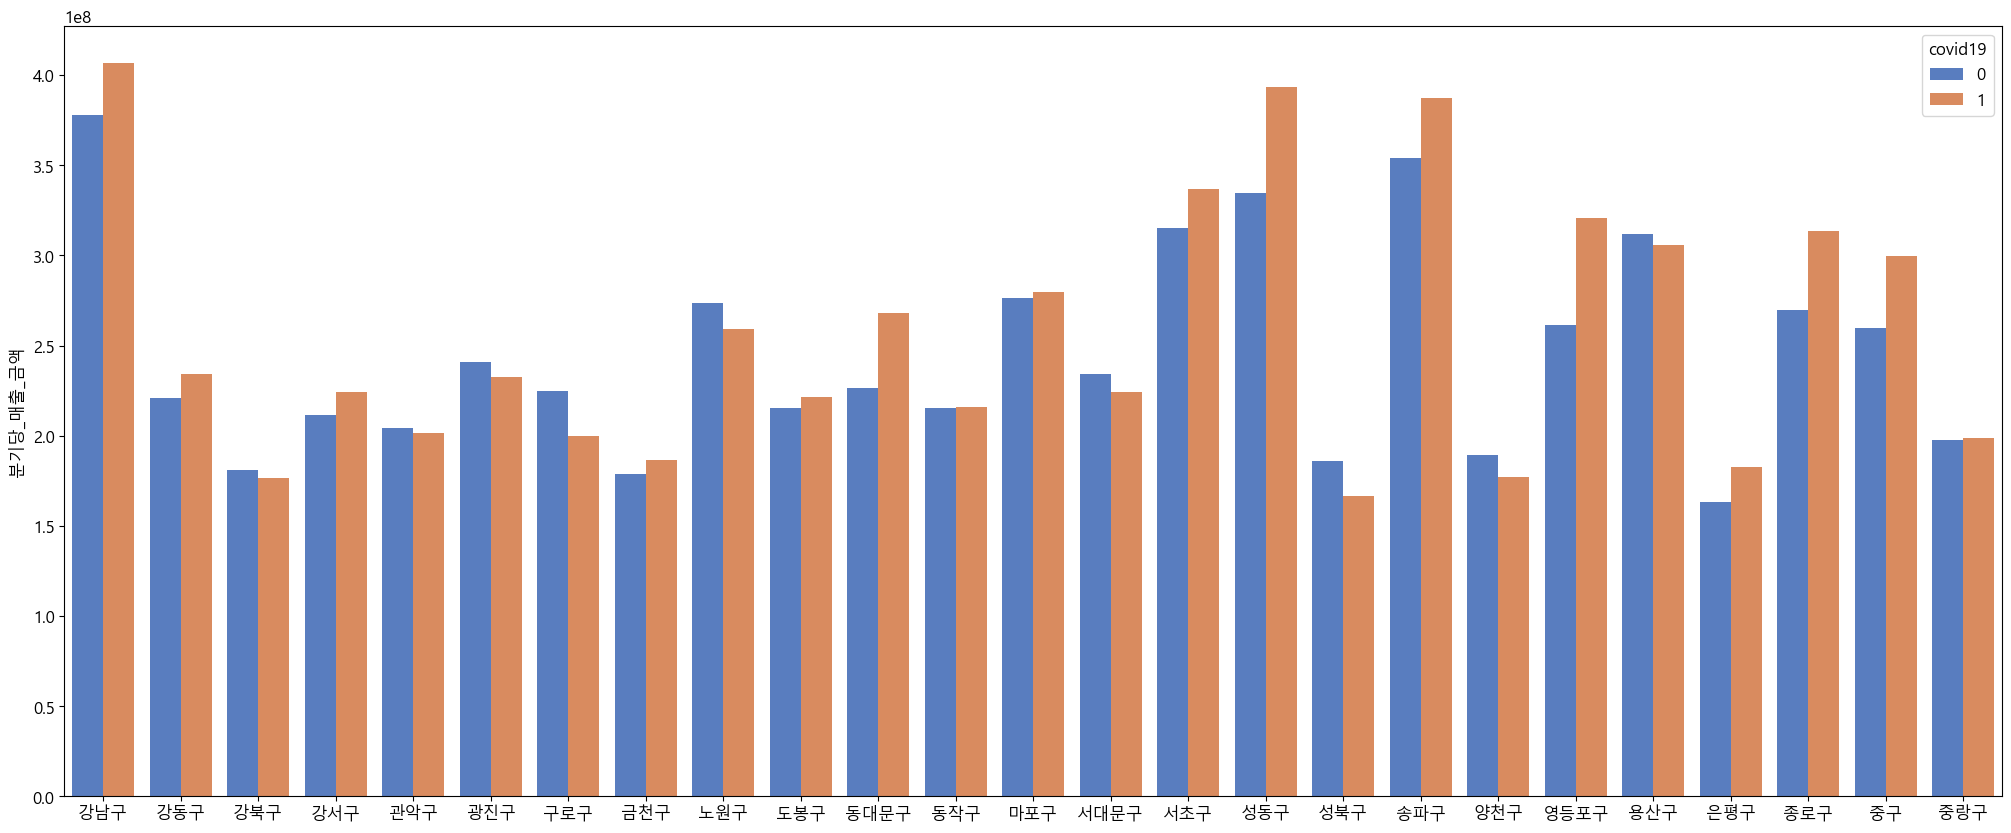

In [42]:
plt.figure(figsize=(25, 10))

sb.barplot(data=tmp,x='시군구명',y='분기당_매출_금액',hue='covid19',palette='muted')
plt.xlabel(None)
plt.show()
plt.close()

#### 상자그림

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

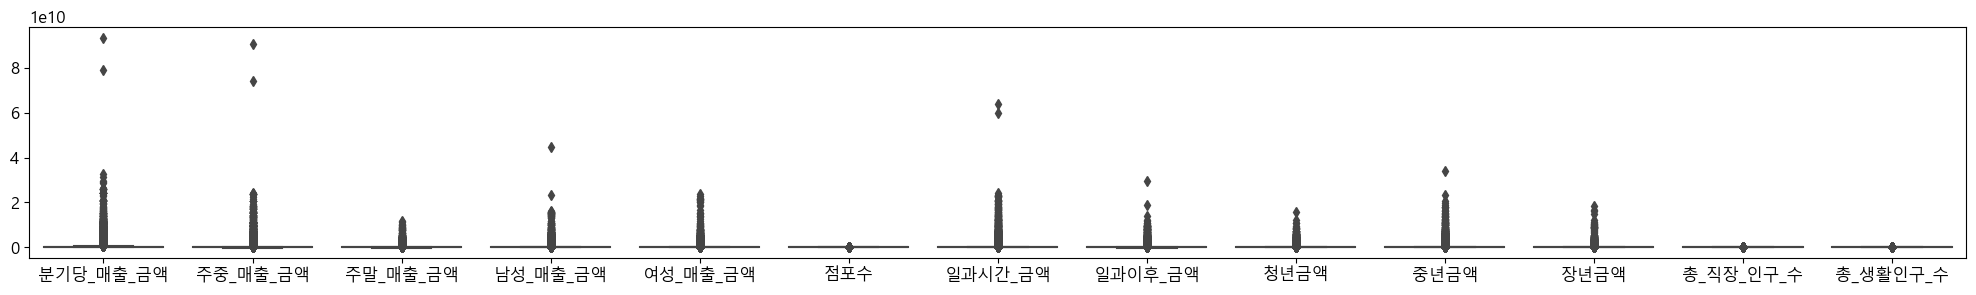

In [44]:
plt.figure(figsize=(25, 3))
sb.boxplot(tmp)
plt.show()
plt.close()

In [43]:
tmp = df.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.491156e+08,7.155273e+08,8.0,19385254.00,67958130.0,2.206690e+08,9.334306e+10
주중_매출_금액,1.890894e+08,5.802866e+08,-70301897.0,14401136.50,50635893.0,1.665412e+08,9.060803e+10
주말_매출_금액,6.002625e+07,1.844163e+08,-60053636.0,2470771.25,13580866.5,5.077027e+07,1.187360e+10
남성_매출_금액,1.211154e+08,3.546736e+08,0.0,7635753.25,30244104.5,1.046423e+08,4.468054e+10
여성_매출_금액,1.038996e+08,3.202041e+08,-7499697.0,6644129.75,26931961.0,9.149827e+07,2.358525e+10
점포수,4.665669e+00,6.393126e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.367521e+08,4.979091e+08,-23926190.0,6570390.00,30422435.5,1.143886e+08,6.369344e+10
일과이후_금액,1.123635e+08,3.054073e+08,-86927726.0,6528123.75,26460168.5,9.311159e+07,2.964962e+10
청년금액,8.026617e+07,2.244493e+08,-3685222.0,3439479.50,16588339.0,6.560932e+07,1.568936e+10
중년금액,1.074401e+08,3.482783e+08,0.0,7668618.25,28746872.0,9.204336e+07,3.420627e+10


## #03. 명목형 변수헤 대한 데이터 타입 변경



In [30]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265928 entries, 0 to 265927
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    265928 non-null  category
 1   기준_분기_코드   265928 non-null  category
 2   상권_코드      265928 non-null  category
 3   분기당_매출_금액  265928 non-null  int64   
 4   주중_매출_금액   265928 non-null  int64   
 5   주말_매출_금액   265928 non-null  int64   
 6   남성_매출_금액   265928 non-null  int64   
 7   여성_매출_금액   265928 non-null  int64   
 8   점포수        265928 non-null  int64   
 9   covid19    265928 non-null  category
 10  일과시간_금액    265928 non-null  int64   
 11  일과이후_금액    265928 non-null  int64   
 12  청년금액       265928 non-null  int64   
 13  중년금액       265928 non-null  int64   
 14  장년금액       265928 non-null  int64   
 15  상권_코드_명    265928 non-null  category
 16  엑스좌표_값     265928 non-null  int64   
 17  와이좌표_값     265928 non-null  int64   
 18  시군구_코드     265928 non-null  category
 19  행정

### 명목형 변수 이름 추출

In [31]:
cat_col = []
for i,v in enumerate(df.dtypes):
    if v=='category':
        cat_col.append(df.columns[i])
cat_col

['기준_년_코드',
 '기준_분기_코드',
 '상권_코드',
 'covid19',
 '상권_코드_명',
 '시군구_코드',
 '행정동_코드',
 '시군구명',
 '시군구코드',
 '도심']

### 명목향 변수로만 이루어진 새로운 데이터프레임

In [33]:
cdf = df[cat_col]
print(cdf.isnull().sum())

기준_년_코드     0
기준_분기_코드    0
상권_코드       0
covid19     0
상권_코드_명     0
시군구_코드      0
행정동_코드      0
시군구명        0
시군구코드       0
도심          0
dtype: int64


### 확인이 필요한 칼럼에 대한 카운트 플롯


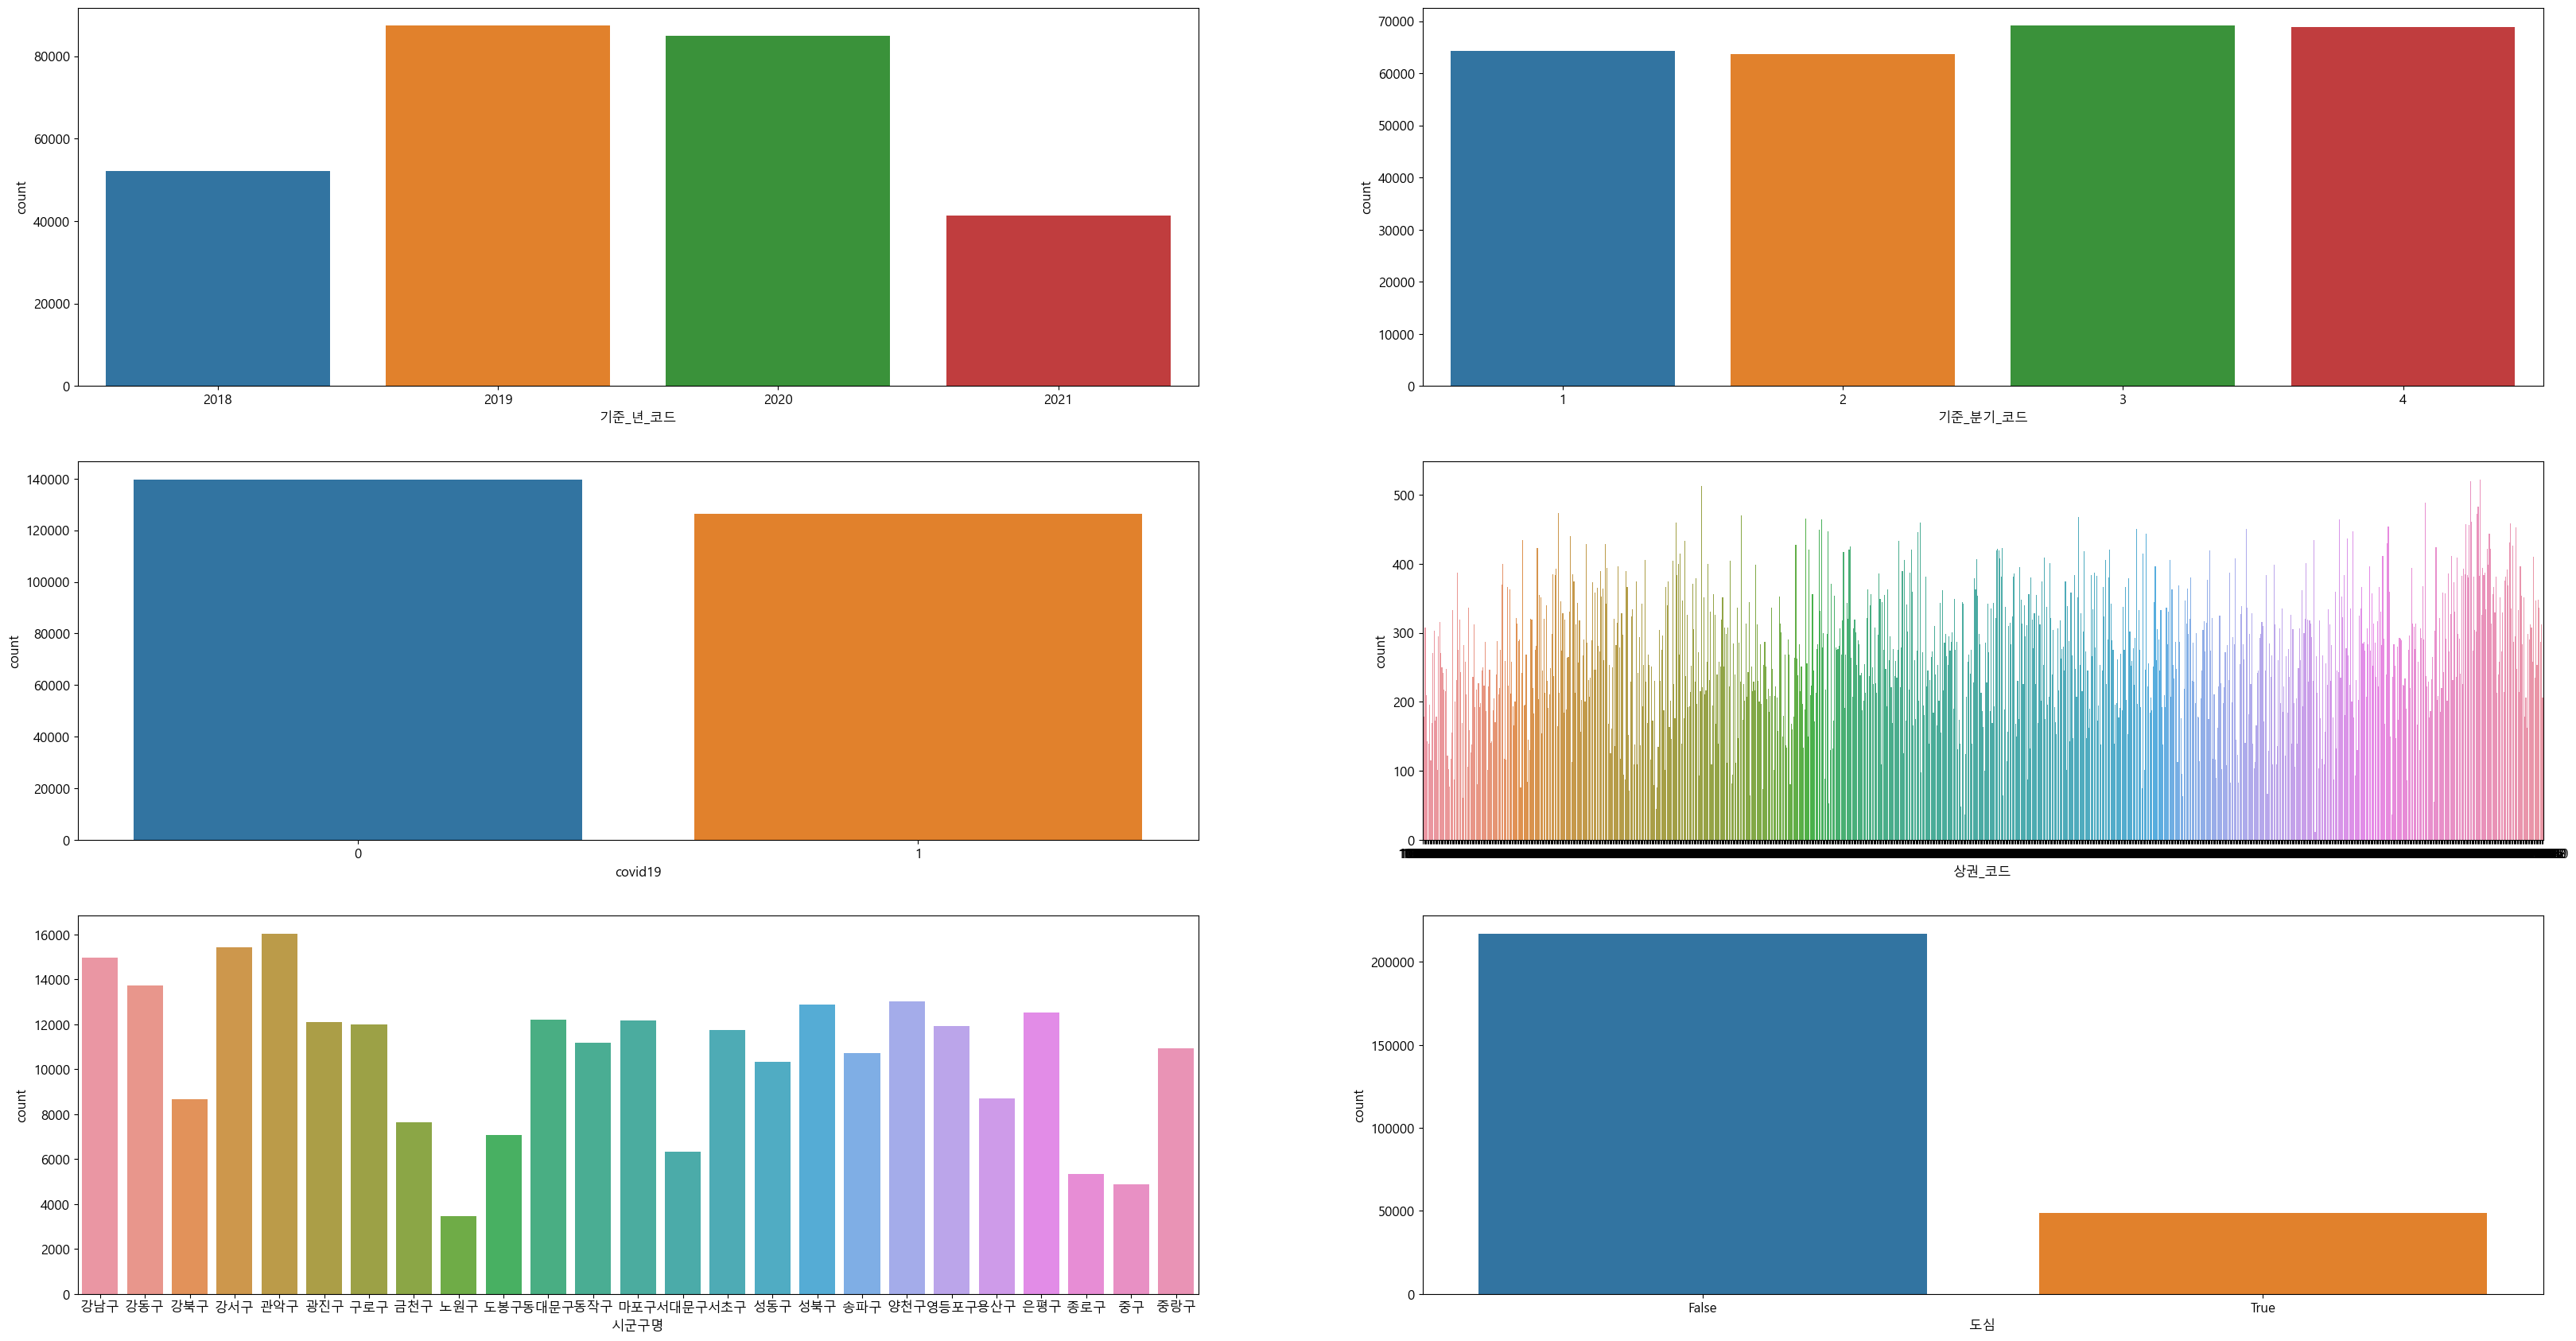

In [35]:
target = ['기준_년_코드','기준_분기_코드','covid19','상권_코드','시군구명','도심']
rows = round(len(target) / 2)

fig, ax = plt.subplots(rows, 2, figsize=(40, 7*rows))

for i, v in enumerate(target):
    r = int(i / 2)
    c = i % 2
    sb.countplot(x=v, data=cdf, ax=ax[r][c])
    
plt.show()
plt.close()


## #04. 최종 데이터 프레임 저장

In [45]:
df.to_excel("골목상권_코로나전후_매출액비교.xlsx", index=False)